In [ ]:
import pandas as pd
import numpy as np

cacao = pd.read_csv(r'/content/flavors_of_cacao.csv', header=0)
cacao.head(5)

,Company,Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Country of Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1795 non-null   object 
 1   Bar Name                1795 non-null   object 
 2   REF                     1795 non-null   int64  
 3   Review Date             1795 non-null   int64  
 4   Cocoa Percent           1795 non-null   object 
 5   Company Location        1795 non-null   object 
 6   Rating                  1795 non-null   float64
 7   Bean Type               1794 non-null   object 
 8   Country of Bean Origin  1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [ ]:
cacao.columns

Index(['Company', 'Bar Name', 'REF', 'Review Date', 'Cocoa Percent',
       'Company Location', 'Rating', 'Bean Type', 'Country of Bean Origin'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# Fit and transform the categorical column
encoded_features = encoder.fit_transform(cacao[['Company', 'Bar Name', 'REF', 'Review Date',
       'Company Location',  'Bean Type', 'Country of Bean Origin']])

# Convert the sparse matrix to a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Company', 'Bar Name', 'REF', 'Review Date',
       'Company Location',  'Bean Type', 'Country of Bean Origin']))
cacao = cacao.drop(columns=['Company', 'Bar Name', 'REF', 'Review Date',
       'Company Location',  'Bean Type', 'Country of Bean Origin'])
# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([cacao, encoded_df], axis=1)



In [ ]:
df_encoded

,Cocoa Percent,Rating,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,...,"Country of Bean Origin_Venezuela, Carribean","Country of Bean Origin_Venezuela, Dom. Rep.","Country of Bean Origin_Venezuela, Ghana","Country of Bean Origin_Venezuela, Java","Country of Bean Origin_Venezuela, Trinidad",Country of Bean Origin_Venezuela/ Ghana,Country of Bean Origin_Vietnam,Country of Bean Origin_West Africa,Country of Bean Origin_,Country of Bean Origin_nan
0,63%,3.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,70%,2.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70%,3.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70%,3.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70%,3.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,70%,3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,65%,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,65%,3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1793,62%,3.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df_encoded['Rating'].apply(lambda x: 1 if x>=3.5 else 0)

In [ ]:
X = df_encoded.drop(['Rating'],axis = 1)

In [ ]:
X['Cocoa Percent'] = X['Cocoa Percent'].str.replace('%', '').astype(float)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

rand = 9
X_train, X_test, y_train, y_test = train_test_split(X, y,\
test_size=0.33, random_state=rand)
orig_plt_params = plt.rcParams
sns.set()
svm_mdl = SVC(probability=True, gamma='auto', random_state=rand)
fitted_svm_mdl = svm_mdl.fit(X_train, y_train)
y_train_svm_pred = fitted_svm_mdl.predict(X_train.astype(float))
y_test_svm_pred = fitted_svm_mdl.predict(X_test.astype(float))

In [ ]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_svm_pred)
mse_test = mean_squared_error(y_test, y_test_svm_pred)

print(f'Mean Squared Error (Train): {mse_train:.4f}')
print(f'Mean Squared Error (Test): {mse_test:.4f}')

Mean Squared Error (Train): 0.4043
Mean Squared Error (Test): 0.3642


In [ ]:
pip install scikit-learn shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 9.3 MB/s eta 0:00:00


In [ ]:
import shap

X_train_summary = shap.kmeans(X_train, 10)

  0%|          | 0/593 [00:00<?, ?it/s]

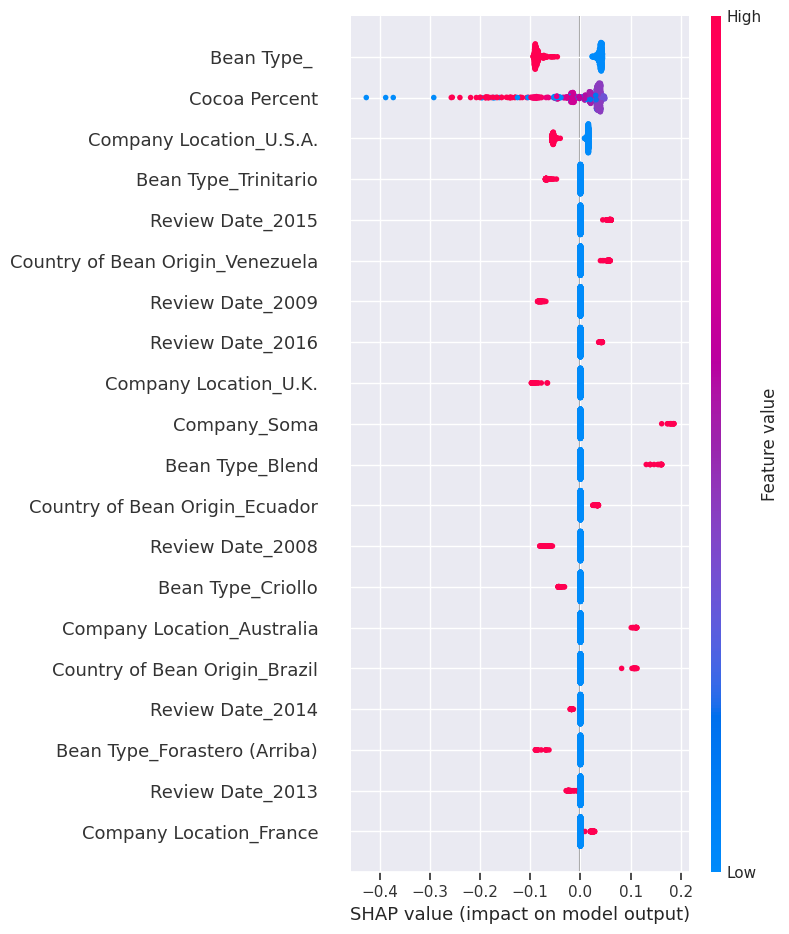

In [ ]:
shap_svm_explainer = shap.KernelExplainer(fitted_svm_mdl.predict_proba,X_train_summary)
shap_svm_values_test = shap_svm_explainer.shap_values(X_test,nsamples=1000, l1_reg="num_features(20)")
shap.summary_plot(shap_svm_values_test[1], X_test, plot_type="dot")

In [ ]:
X_test.iloc[6]

Cocoa Percent                              70.0
Company_A. Morin                            0.0
Company_AMMA                                0.0
Company_Acalli                              0.0
Company_Adi                                 0.0
                                           ... 
Country of Bean Origin_Venezuela/ Ghana     0.0
Country of Bean Origin_Vietnam              0.0
Country of Bean Origin_West Africa          0.0
Country of Bean Origin_                     0.0
Country of Bean Origin_nan                  0.0
Name: 303, Length: 2111, dtype: float64

False


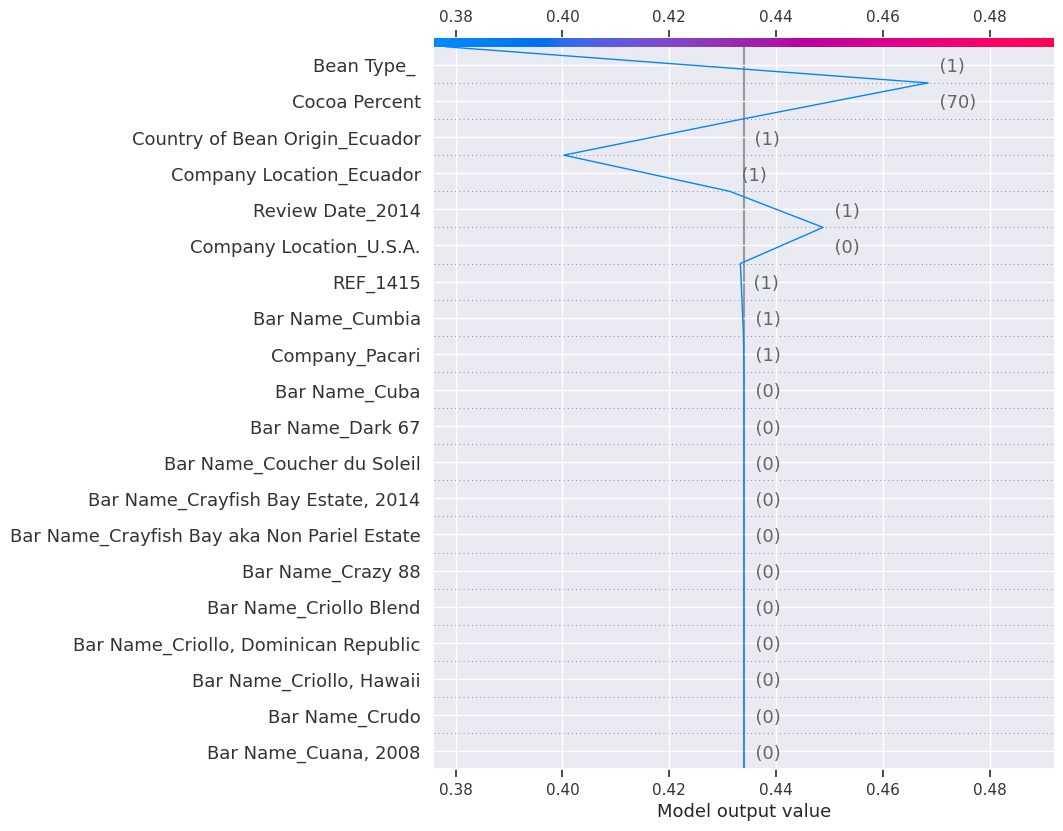

In [ ]:
expected_value = shap_svm_explainer.expected_value[1]
"""y_test_shap_pred = (shap_svm_values_test[1].sum(1) + expected_value) > 0.5
print(np.array_equal(y_test_shap_pred, y_test_svm_pred))"""

shap.decision_plot(expected_value,
shap_svm_values_test[1][5],\
X_test.iloc[5])

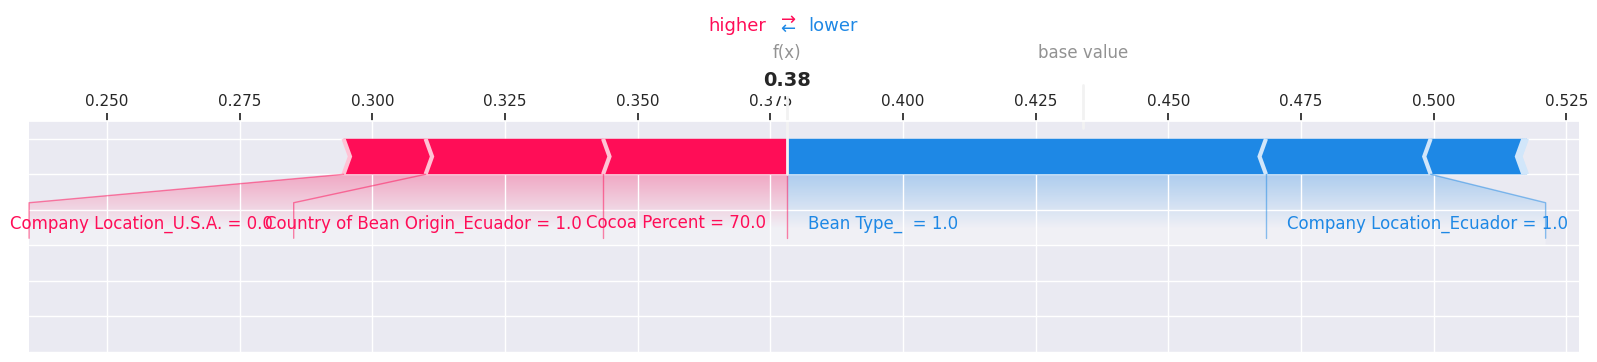

In [ ]:
shap.force_plot(expected_value,
shap_svm_values_test[1][5],\
X_test.iloc[5],matplotlib = True)

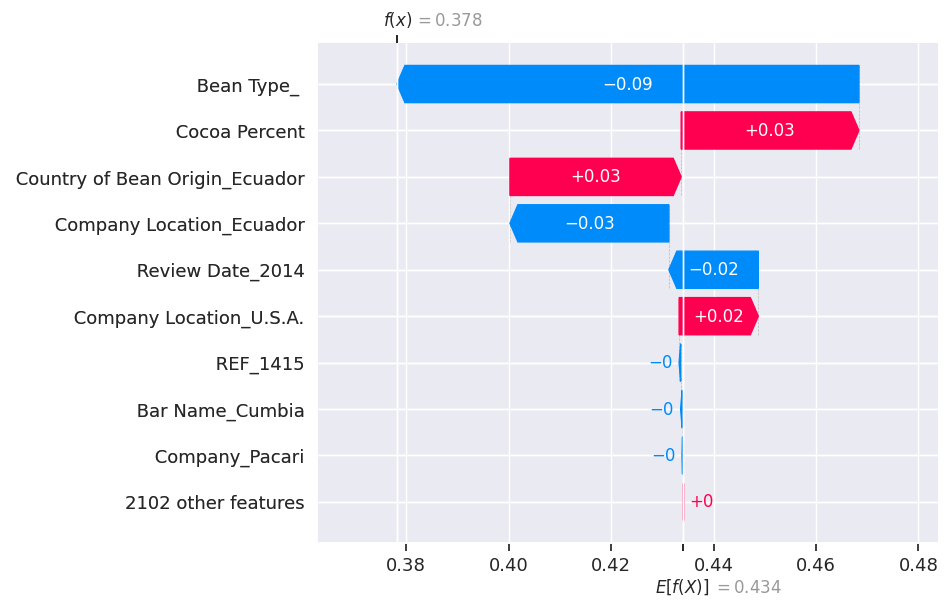

In [ ]:
shap.plots._waterfall.waterfall_legacy(expected_value,
shap_svm_values_test[1][5],X_test.iloc[5])

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=26a51169c5c52dc6af20bd7bfd46e283907b27d39a1b511314a25b46e65474e0
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime.lime_tabular
from lime.lime_text import LimeTextExplainer
from sklearn.svm import SVC

svm_mdl = SVC(probability=True, gamma='auto', random_state=rand)
fitted_svm_mdl = svm_mdl.fit(X_train, y_train)

lime_svm_explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,\
feature_names=X_test.columns,\
class_names=['Not Highly Recomm.', 'Highly Recomm.'])
lime_svm_explainer.explain_instance(X_test[X_test.index==5].values[0],\
fitted_svm_mdl.predict_proba,\
num_features=8).\
show_in_notebook(predict_proba=True)

X does not have valid feature names, but SVC was fitted with feature names
